# Importing Libraries

In [1]:
import os 
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D, MaxPooling2D, BatchNormalization,Dropout, Flatten,Activation,concatenate,Input,AlphaDropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
import random as rn
import cv2                  
from tqdm import tqdm
from random import shuffle  
import itertools
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import backend as K



Using TensorFlow backend.


# Creating Dataset

In [2]:
x=[]
y=[]
size=150
path='../input/flowers/'
for ftype in os.listdir(path):
    for img in tqdm(os.listdir(path+ftype)):
        label=ftype
        path1 = os.path.join(path+ftype,img)
        img = plt.imread(path1)
        img = cv2.resize(img, (size,size))
        x.append(np.array(img))
        y.append(str(label))

100%|██████████| 784/784 [00:05<00:00, 141.14it/s]


In [3]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y=to_categorical(y,5)
x=np.array(x)

# Splitting Data into Training, Testing and Validation Datasets

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.10,random_state=42,stratify=y_train)

In [5]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

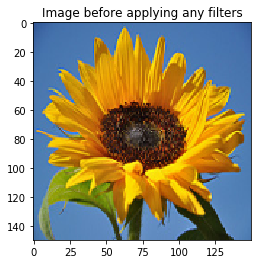

In [6]:
plt.imshow(x_train[1277])
plt.title("Image before applying any filters")
plt.show()

# Applying Sharpning Filter

In [7]:
sharpx_train=[]
sharpx_val=[]
sharpx_test=[]

skernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])

for image in x_train:
    sharp = cv2.filter2D(image, -1, skernel)
    sharpx_train.append(sharp)

for image in x_val:
    sharp = cv2.filter2D(image, -1, skernel)
    sharpx_val.append(sharp)

for image in x_test:
    sharp = cv2.filter2D(image, -1, skernel)
    sharpx_test.append(sharp)

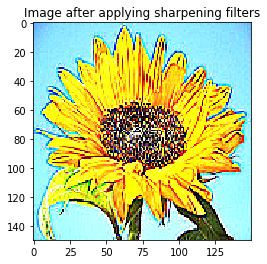

In [8]:
plt.imshow(sharpx_train[1277])
plt.title("Image after applying sharpening filters")
plt.show()

# Applying Gaussians Filter

In [9]:
gaussx_train=[]
gaussx_val=[]
gaussx_test=[]


for image in x_train:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gaussx_train.append(gauss_feature)

for image in x_val:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gaussx_val.append(gauss_feature)

for image in x_test:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gaussx_test.append(gauss_feature)

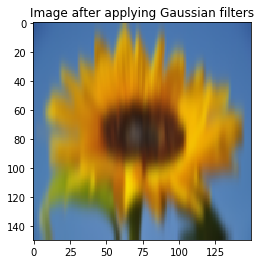

In [10]:
plt.imshow(gaussx_train[1277])
plt.title("Image after applying Gaussian filters")
plt.show()

# Applying Gabor Filter

In [11]:
gaborx_train=[]
gaborx_val=[]
gaborx_test=[]

g_kernel = cv2.getGaborKernel((13, 13), 4.0, 56.2, 10.0, 1, 0, ktype=cv2.CV_32F)

    
for image in x_train:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gaborx_train.append(gabor_feature)

for image in x_val:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gaborx_val.append(gabor_feature)

for image in x_test:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gaborx_test.append(gabor_feature)

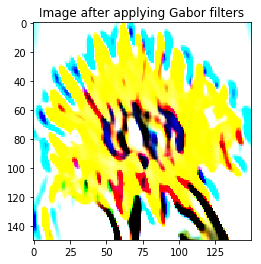

In [12]:
plt.imshow(gaborx_train[1277])
plt.title("Image after applying Gabor filters")
plt.show()

# Image Normalization

In [13]:
sharpx_train=np.array(sharpx_train)/255
sharpx_val=np.array(sharpx_val)/255
sharpx_test=np.array(sharpx_test)/255

gaussx_train=np.array(gaussx_train)/255
gaussx_val=np.array(gaussx_val)/255
gaussx_test=np.array(gaussx_test)/255

gaborx_train=np.array(gaborx_train)/255
gaborx_val=np.array(gaborx_val)/255
gaborx_test=np.array(gaborx_test)/255

# Building a Basic CNN

In [14]:
input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
out = Dense(5, activation = "softmax")(x)

gabormodel = Model(input1, out)
gabormodel.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
out = Dense(5, activation = "softmax")(x)

sharpmodel = Model(input1, out)
sharpmodel.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
out = Dense(5, activation = "softmax")(x)

gaussmodel = Model(input1, out)
gaussmodel.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



# Creating Callback Functions

In [15]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelgaborbest.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the model using Gabor Features

In [16]:
history = gabormodel.fit(gaborx_train,y_train, batch_size=128,
                              epochs = 30, 
                              validation_data = (gaborx_val,y_val),
                              callbacks=callbacks,
                              verbose = 1,
                             )

Train on 3107 samples, validate on 346 samples
Epoch 1/30
3107/3107 [==============================] - 9s 3ms/step - loss: 0.4875 - acc: 0.7987 - val_loss: 0.4520 - val_acc: 0.8029

Epoch 00001: val_acc improved from -inf to 0.80289, saving model to modelgaborbest.h5
Epoch 2/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.4040 - acc: 0.8135 - val_loss: 0.3820 - val_acc: 0.8185

Epoch 00002: val_acc improved from 0.80289 to 0.81850, saving model to modelgaborbest.h5
Epoch 3/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.3653 - acc: 0.8337 - val_loss: 0.3540 - val_acc: 0.8324

Epoch 00003: val_acc improved from 0.81850 to 0.83237, saving model to modelgaborbest.h5
Epoch 4/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.3359 - acc: 0.8525 - val_loss: 0.3445 - val_acc: 0.8491

Epoch 00004: val_acc improved from 0.83237 to 0.84913, saving model to modelgaborbest.h5
Epoch 5/30
3107/3107 [==============================] - 4s 1

# Visualisation of the Model Training  

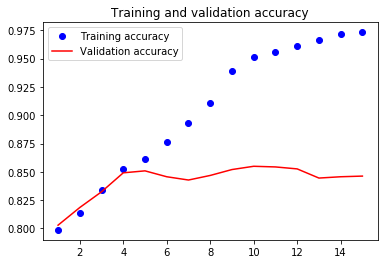

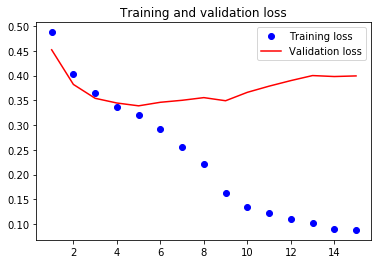

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [18]:
pred=np.argmax(gabormodel.predict(gaborx_test),axis=1)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Greens):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting Confusion Matrix 

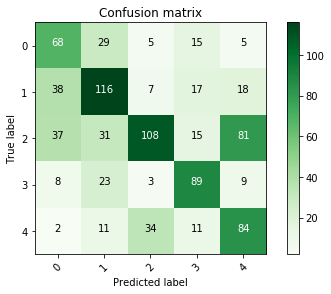

In [20]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [21]:
gabormodel.evaluate(gaborx_test,y_test)

864/864 [==============================] - 1s 632us/step


[0.37113827687722667, 0.8384259298995689]

In [22]:
gabormodel.save('gabor_model.h5')

In [23]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelgaussbest.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the model using Gaussian Features

In [24]:
history = gaussmodel.fit(gaussx_train,y_train, batch_size=128,
                              epochs = 30, 
                              validation_data = (gaussx_val,y_val),
                              callbacks=callbacks,
                              verbose = 1,
                        )

Train on 3107 samples, validate on 346 samples
Epoch 1/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.4669 - acc: 0.7988 - val_loss: 0.4038 - val_acc: 0.8237

Epoch 00001: val_acc improved from -inf to 0.82370, saving model to modelgaussbest.h5
Epoch 2/30
3107/3107 [==============================] - 3s 999us/step - loss: 0.3931 - acc: 0.8160 - val_loss: 0.3750 - val_acc: 0.8145

Epoch 00002: val_acc did not improve from 0.82370
Epoch 3/30
3107/3107 [==============================] - 3s 974us/step - loss: 0.3621 - acc: 0.8375 - val_loss: 0.3507 - val_acc: 0.8428

Epoch 00003: val_acc improved from 0.82370 to 0.84277, saving model to modelgaussbest.h5
Epoch 4/30
3107/3107 [==============================] - 3s 997us/step - loss: 0.3407 - acc: 0.8530 - val_loss: 0.3337 - val_acc: 0.8486

Epoch 00004: val_acc improved from 0.84277 to 0.84855, saving model to modelgaussbest.h5
Epoch 5/30
3107/3107 [==============================] - 3s 1ms/step - loss: 0.3212 - acc: 0.8

# Visualisation of the Model Training

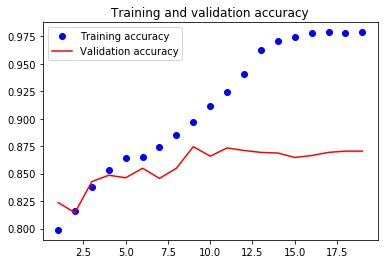

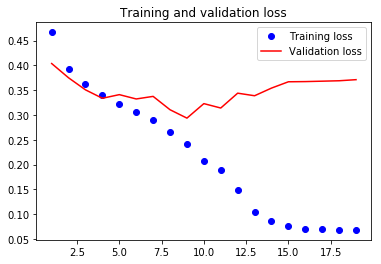

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
pred=np.argmax(gaussmodel.predict(gaussx_test),axis=1)

# Plotting Confusion Matrix

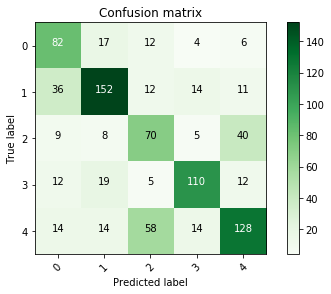

In [27]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [28]:
gaussmodel.evaluate(gaussx_test,y_test)

864/864 [==============================] - 1s 634us/step


[0.32439251133689173, 0.8648148267357437]

In [29]:
gaussmodel.save('gauss_model.h5')

In [30]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelsharpbest.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the model using Sharp Features

In [31]:
history = sharpmodel.fit(sharpx_train,y_train, batch_size=128,
                              epochs = 30, 
                              validation_data = (sharpx_val,y_val),
                              callbacks=callbacks,
                              verbose = 1,
                              )

Train on 3107 samples, validate on 346 samples
Epoch 1/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.4945 - acc: 0.7972 - val_loss: 0.4204 - val_acc: 0.8052

Epoch 00001: val_acc improved from -inf to 0.80520, saving model to modelsharpbest.h5
Epoch 2/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.4215 - acc: 0.8077 - val_loss: 0.3991 - val_acc: 0.8208

Epoch 00002: val_acc improved from 0.80520 to 0.82081, saving model to modelsharpbest.h5
Epoch 3/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.3851 - acc: 0.8266 - val_loss: 0.3561 - val_acc: 0.8364

Epoch 00003: val_acc improved from 0.82081 to 0.83642, saving model to modelsharpbest.h5
Epoch 4/30
3107/3107 [==============================] - 4s 1ms/step - loss: 0.3508 - acc: 0.8480 - val_loss: 0.3623 - val_acc: 0.8410

Epoch 00004: val_acc improved from 0.83642 to 0.84104, saving model to modelsharpbest.h5
Epoch 5/30
3107/3107 [==============================] - 4s 1

# Visualisation of the Model Training

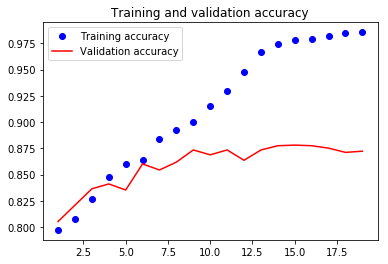

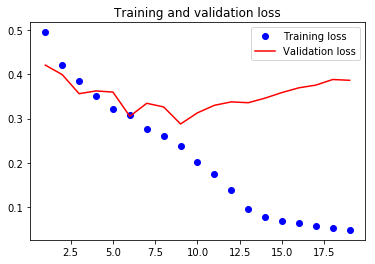

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
pred=np.argmax(sharpmodel.predict(sharpx_test),axis=1)

# Plotting Confusion Matrix

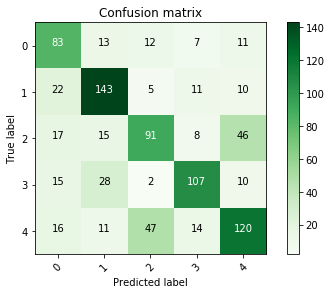

In [34]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [35]:
sharpmodel.evaluate(sharpx_test,y_test)

864/864 [==============================] - 1s 605us/step


[0.3116294416012587, 0.8664351856267011]

In [36]:
sharpmodel.save('sharp_model.h5')

# Creating a Merged CNN

In [37]:
input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'selu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = AlphaDropout(0.3,seed = 2019)(x)
out1 = Flatten()(x)


input2 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input2)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'selu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = AlphaDropout(0.3,seed = 2019)(x)
out2 = Flatten()(x)

input3 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input3)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'selu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = AlphaDropout(0.3,seed = 2019)(x)
out3 = Flatten()(x)


concatenated = concatenate([out1, out2, out3])

x = Dense(1024)(concatenated)
x = Activation('sigmoid')(x)
x = Dense(512)(concatenated)
x = Activation('sigmoid')(x)
out = Dense(5, activation = "softmax")(x)




model2 = Model([input1, input2, input3], out)
model2.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True)

In [39]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('model2best.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 4, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the Merged CNN Model Using Both Gabor and Gaussian Features

In [40]:
history = model2.fit([gaussx_train,gaborx_train,sharpx_train],y_train, batch_size=128,
                              epochs = 30, 
                              validation_data = ([gaussx_val,gaborx_val,sharpx_val],y_val),
                              callbacks=callbacks,
                              verbose = 1,
                              )

Train on 3107 samples, validate on 346 samples
Epoch 1/30
3107/3107 [==============================] - 13s 4ms/step - loss: 0.7341 - acc: 0.7277 - val_loss: 0.8975 - val_acc: 0.6931

Epoch 00001: val_acc improved from -inf to 0.69306, saving model to model2best.h5
Epoch 2/30
3107/3107 [==============================] - 12s 4ms/step - loss: 0.6600 - acc: 0.7552 - val_loss: 0.4497 - val_acc: 0.8029

Epoch 00002: val_acc improved from 0.69306 to 0.80289, saving model to model2best.h5
Epoch 3/30
3107/3107 [==============================] - 12s 4ms/step - loss: 0.4104 - acc: 0.8088 - val_loss: 0.3834 - val_acc: 0.8220

Epoch 00003: val_acc improved from 0.80289 to 0.82197, saving model to model2best.h5
Epoch 4/30
3107/3107 [==============================] - 12s 4ms/step - loss: 0.3809 - acc: 0.8221 - val_loss: 0.3648 - val_acc: 0.8289

Epoch 00004: val_acc improved from 0.82197 to 0.82890, saving model to model2best.h5
Epoch 5/30
3107/3107 [==============================] - 12s 4ms/step - l

# Visualisation of the Model Training for Merged Convolutional Neural Network

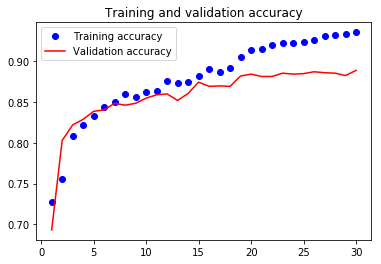

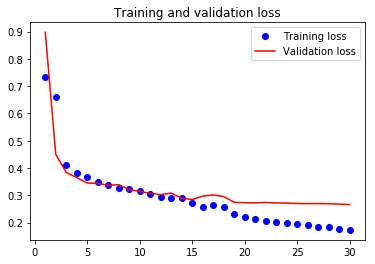

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
pred=np.argmax(model2.predict([gaussx_test,gaborx_test,sharpx_test]),axis=1)

# Plotting Confusion Matrix for Merged Model

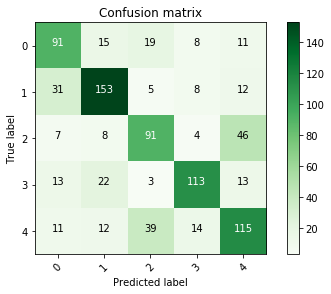

In [43]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [44]:
model2.evaluate([gaussx_test,gaborx_test,sharpx_test],y_test)

864/864 [==============================] - 2s 2ms/step


[0.2997655145548008, 0.8687500026490953]

In [45]:
model2.save('merged_model.h5')